In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
mydata=pd.read_csv("cardiogoodfitness-1.csv")


In [4]:
mydata.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
112,TM498,29,Female,14,Partnered,3,3,51165,95
105,TM498,25,Male,16,Partnered,2,3,50028,53
55,TM195,31,Male,14,Partnered,2,2,54576,47
99,TM498,25,Male,16,Partnered,2,2,52302,42
124,TM498,33,Female,18,Single,3,4,47754,74
136,TM498,40,Female,16,Single,3,3,57987,85
88,TM498,23,Male,14,Partnered,3,3,38658,85
1,TM195,19,Male,15,Single,2,3,31836,75
27,TM195,25,Female,14,Partnered,3,3,48891,75
84,TM498,21,Female,14,Partnered,5,4,34110,212


In [6]:
corr = mydata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot: >

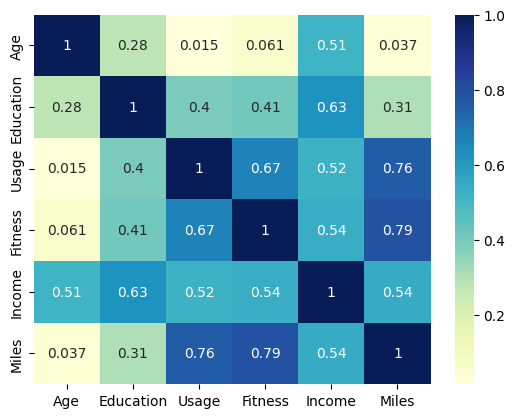

In [8]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")

### ML algorithm

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
df=pd.read_csv("auto-mpg.csv")

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
df.shape

(398, 9)

In [14]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [19]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [21]:
median=df['horsepower'].median()
median

93.5

In [22]:
df['horsepower'].replace(np.nan,median,inplace=True)

In [24]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [26]:
### duplicate

duplicate=df.duplicated()
duplicate.sum()

0

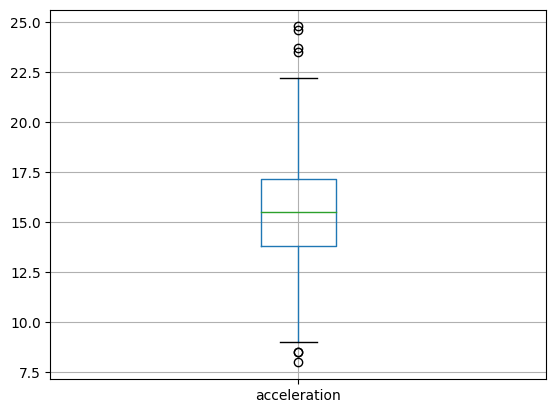

In [28]:
### Outliers
df.boxplot(column="acceleration")
plt.show()

In [29]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3-(1.5*iqr)
    return lower_range,upper_range

In [31]:
lowacc,highacc=remove_outlier(df["acceleration"])

In [33]:
df["acceleration"]=np.where(df["acceleration"]>highacc,highacc,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<lowacc,lowacc,df["acceleration"])

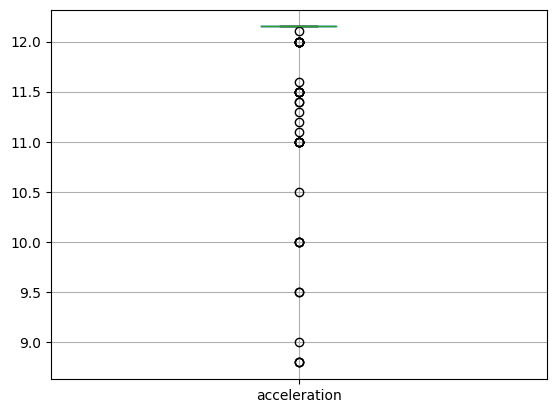

In [34]:
df.boxplot(column="acceleration")
plt.show()

In [35]:
lowacc1,highacc1=remove_outlier(df["cylinders"])

In [ ]:
df["cylinders"]=np.where(df["acceleration"]>highacc,highacc,df["acceleration"])
df["acceleration"]=np.where(df["acceleration"]<lowacc,lowacc,df["acceleration"])

In [39]:
### Droping the column
df=df.drop("car name",axis=1)

In [40]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
217,30.0,4,111.0,80.0,2155,12.15,77,1
174,18.0,6,171.0,97.0,2984,12.15,75,1
316,19.1,6,225.0,90.0,3381,12.15,80,1
105,13.0,8,360.0,170.0,4654,12.15,73,1
40,14.0,8,351.0,153.0,4154,12.15,71,1
56,26.0,4,91.0,70.0,1955,12.15,71,1
29,27.0,4,97.0,88.0,2130,12.15,71,3
27,11.0,8,318.0,210.0,4382,12.15,70,1
140,14.0,8,304.0,150.0,4257,12.15,74,1
39,14.0,8,400.0,175.0,4464,11.50,71,1


In [41]:
df["origin"]=df["origin"].replace({1:"america",2:"Europe",3:"asia"})


In [42]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
380,36.0,4,120.0,88.0,2160,12.15,82,asia
26,10.0,8,307.0,200.0,4376,12.15,70,america
342,30.0,4,135.0,84.0,2385,12.15,81,america
340,25.8,4,156.0,92.0,2620,12.15,81,america
322,46.6,4,86.0,65.0,2110,12.15,80,asia
193,24.0,6,200.0,81.0,3012,12.15,76,america
240,30.5,4,97.0,78.0,2190,12.15,77,Europe
24,21.0,6,199.0,90.0,2648,12.15,70,america
129,31.0,4,79.0,67.0,1950,12.15,74,asia
66,17.0,8,304.0,150.0,3672,11.50,72,america


In [50]:
df=pd.get_dummies(df,columns=["origin"])

KeyError: "None of [Index(['origin'], dtype='object')] are in the [columns]"

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [52]:
so=pd.read_csv("loan_prediction.csv")

In [55]:
so.shape

(614, 13)

In [56]:
so.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
502,LP002615,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban,Y
469,LP002505,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
151,LP001529,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
392,LP002263,Male,Yes,0,Graduate,No,2583,2115.0,120.0,360.0,NaN,Urban,Y
499,LP002602,Male,No,0,Graduate,No,6283,4416.0,209.0,360.0,0.0,Rural,N
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
255,LP001846,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
505,LP002622,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y
134,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y


In [57]:
so.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [62]:
so.boxplot(columns="ApplicantIncome","CoapplicantIncome")
plt.show()

SyntaxError: positional argument follows keyword argument (690624931.py, line 1)